In [1]:
!git clone https://github.com/KostyaDekhant/comp-vision-lr5
%cd comp-vision-lr5

Cloning into 'comp-vision-lr5'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 5.60 MiB | 21.24 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/comp-vision-lr5


In [2]:
!apt-get update -qq
!apt-get install -y -qq tesseract-ocr tesseract-ocr-rus tesseract-ocr-deu tesseract-ocr-eng poppler-utils
!pip -q install pytesseract opencv-python pillow qrcode pdf2image numpy

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package poppler-utils.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.12_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.12) ...
Selecting previously unselected package tesseract-ocr-deu.
Preparing to unpack .../tesseract-ocr-deu_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-deu (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselected package tesseract-ocr-rus.
Preparing to unpack .../tesseract-ocr-rus_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-rus (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-deu (1:4.00~git30-7274cfa-1.1) ...
Setting up poppler-utils (22.02.0-2ubuntu0.12) ...
Setting up tesseract-ocr-rus (1:4.00~git30-7274cfa-1

In [3]:
import qrcode
import os
import re
import cv2
import numpy as np
from PIL import Image
from pytesseract import Output
import pytesseract
from pdf2image import convert_from_path
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# ----------------- Функция для отображения изображений -----------------
def display_image(input_img, caption=None, size=(9,7)):
    if isinstance(input_img, str):
        input_img = cv2.imread(input_img)
    if input_img is None:
        print("Ошибка: изображение не найдено!")
        return
    rgb_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=size)
    plt.imshow(rgb_img)
    plt.axis("off")
    if caption:
        plt.title(caption)
    plt.show()

QR-код сохранён в файл: wiki_qr.png
Текст, считанный с QR-кода: https://www.wikipedia.org


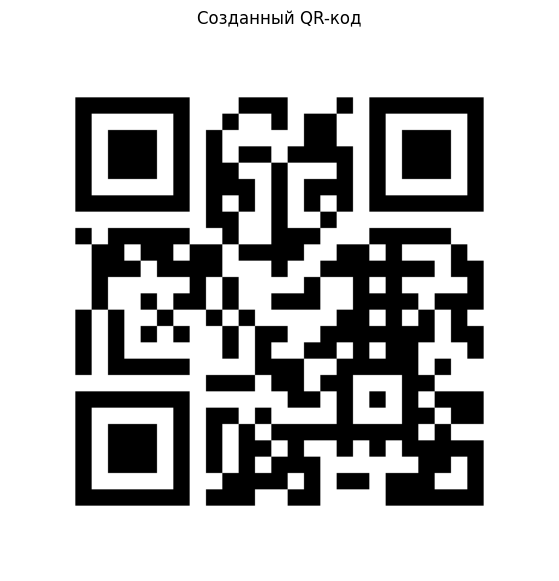

In [7]:
# ----------------- Генерация QR-кода -----------------
website = "https://www.wikipedia.org"  # другая существующая ссылка

generated_qr = qrcode.make(website)
qr_output_file = "wiki_qr.png"
generated_qr.save(qr_output_file)

print("QR-код сохранён в файл:", qr_output_file)

qr_image = cv2.imread(qr_output_file)
qr_detector = cv2.QRCodeDetector()
decoded_text, pts, _ = qr_detector.detectAndDecode(qr_image)

print("Текст, считанный с QR-кода:", decoded_text)
display_image(qr_output_file, "Созданный QR-код")

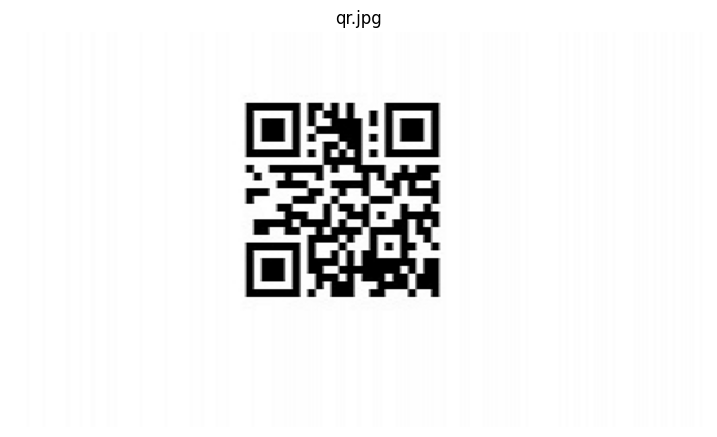

Результат распознавания QR: http://www.bio.asu.ru/


In [8]:
# ----------------- Распознавание QR из существующего файла -----------------
qr_input = "qr.jpg"

qr_img = cv2.imread(qr_input)
display_image(qr_img, "qr.jpg")

detector = cv2.QRCodeDetector()
decoded, pts, _ = detector.detectAndDecode(qr_img)

print("Результат распознавания QR:", decoded)

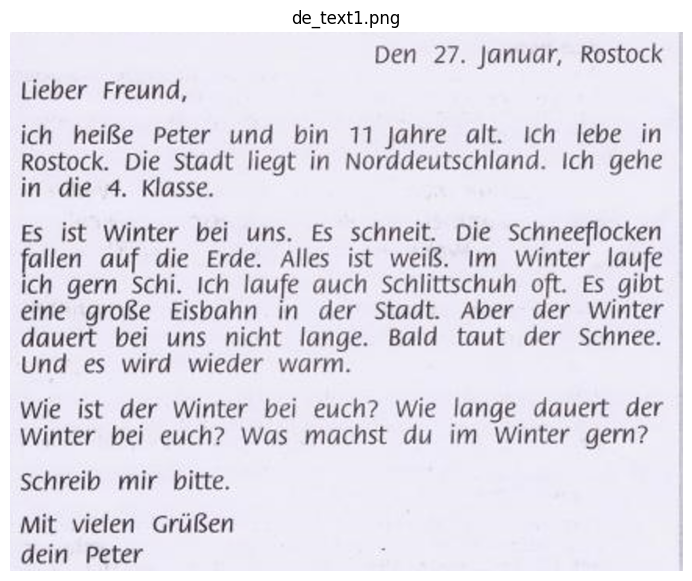

Количество найденных слов 'ich': 5


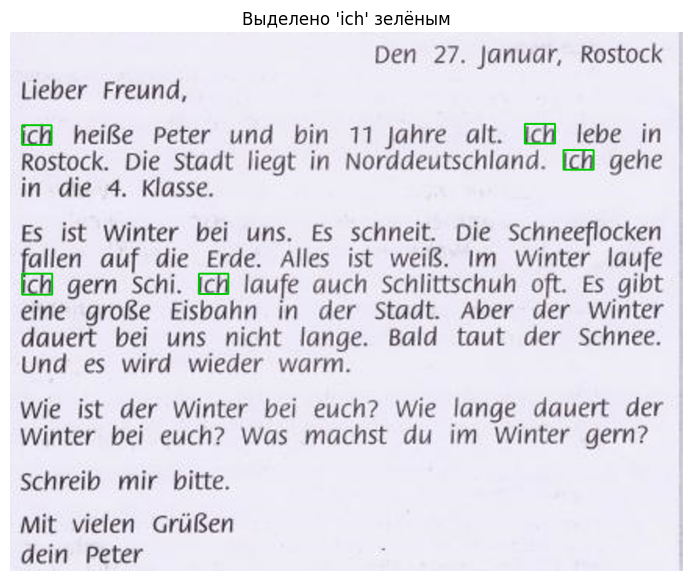

In [13]:
# ----------------- Поиск немецкого слова на изображении -----------------
german_file = "de_text1.png"
g_img = cv2.imread(german_file)
display_image(g_img, "de_text1.png")

ocr_data = pytesseract.image_to_data(g_img, lang="deu", output_type=Output.DICT)

highlighted_img = g_img.copy()
found_count = 0
for idx in range(len(ocr_data["text"])):
    token = ocr_data["text"][idx].strip()
    confidence = float(ocr_data["conf"][idx]) if ocr_data["conf"][idx] != "-1" else -1

    if confidence > 0 and token.lower() == "ich":
        x0, y0, w0, h0 = ocr_data["left"][idx], ocr_data["top"][idx], ocr_data["width"][idx], ocr_data["height"][idx]
        cv2.rectangle(highlighted_img, (x0, y0), (x0+w0, y0+h0), (0,200,0), 2)
        found_count += 1

output_file_german = "de_text1_ich_highlighted.png"
cv2.imwrite(output_file_german, highlighted_img)

print(f"Количество найденных слов 'ich': {found_count}")
display_image(highlighted_img, "Выделено 'ich' зелёным")

In [14]:
# ----------------- Вывод текста с изображения -----------------
recognized_text = pytesseract.image_to_string(g_img, lang="deu")
print("Текст с изображения:\n", recognized_text)

Текст с изображения:
 Den 27. Januar, Rostock
Lieber Freund,

ich heiße Peter und bin 11 jahre alt. Ich lebe in
Rostock. Die Stadt liegt in Norddeutschland. Ich gehe
in die 4. Klasse.

Es ist Winter bei uns. Es schneit. Die Schneeflocken
fallen auf die Erde. Alles ist weiß. Im Winter laufe
ich gern Schi. Ich laufe auch Schlittschuh oft. Es gibt
eine große Eisbahn in der Stadt. Aber der Winter
dauert bei uns nicht lange. Bald taut der Schnee.
Und es wird wieder warm.

wie ist der Winter bei euch? Wie lange dauert der
Winter bei euch? Was machst du im Winter gern?

Schreib mir bitte.

Mit vielen Grüßen
dein Peter




Файл сохранён: rus_text1_best_adaptive.png

=== Распознанный текст из rus_text1.jpg ===
.. . 7 .. : - . . : , . и . 7 . - .. ь . ат. Г. и . и й . .. . ий - , ..- я -. и . , - . 7. т . . . .. . - -. . . . : - т - . , - -. .-: -тт- - . .. - (ти О 7. - --. .. ... . , 7 Яр . -. в и г долее 7 .. и. о . . О т. , -. - р г ИА . . , ( (( : 7.. , . - 2 мо о 2. . . ООО ... а. - . та .7 . . - ... ре (я . . : , - . . . с. .. - .- . ,. . . й .. : . о .. . . г. .- ое . , .. .- ... ры . А ) - 7 . . : . ит ое о .. 47 а. ИИ . (г О - . - : .. --. п : -- . 3 . ОЗ . а о ИИ - ще . . . . - ин щк. от .. 77 , . н- .. с ОИ .. ее ! . . . , щ. т: .х. г о ., . . .. : . --- - . . . Е . : и , 1. о . -- щ. : . г, , с - й : ,. т Ш. 2. : : ВоВ . : . : . . . , - : р , . у , -- : -. . х. . : ИВ . ) и 7 : . : . . ! - -. - . . , . нс 1 : . . ИИ : он . . к К д , 1 . я. . , 2 . - И отыт .. . о 7 , .. , .. : , , . - . . : 7 . : - .: .. Г: . 2, . . й . .. . . . а -. (о И ... г : т. - . . .. . . ) - а ,. : о? 6. ВИ тако т. ик 

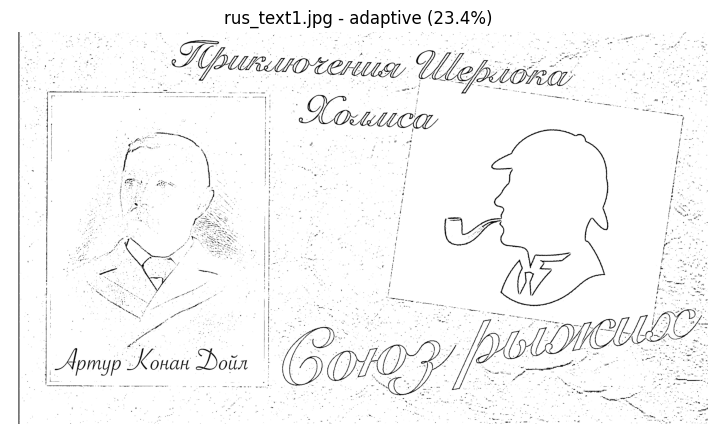


Файл сохранён: rus_text2_best_adaptive.png

=== Распознанный текст из rus_text2.jpg ===
аа Не ее, НЕ т аа АА м 2. О РИ Ч В ААА и: и рае о ая У А ПА, У м. КО а кАА, А Ав мы Ал И А й НЫ ц. с А ть еде . - О и У цу АН о ег: и ЗАСА: р о м. Е О о А м Те ее с а - Зоо и т Е. Е. И В



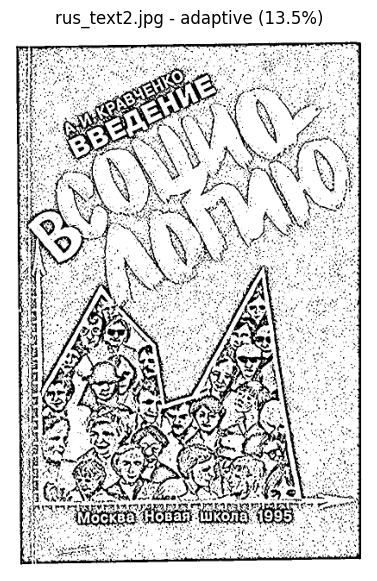


Файл сохранён: rus_text3_best_adaptive.png

=== Распознанный текст из rus_text3.jpg ===
НироииЕ баЧиблОрИЕ



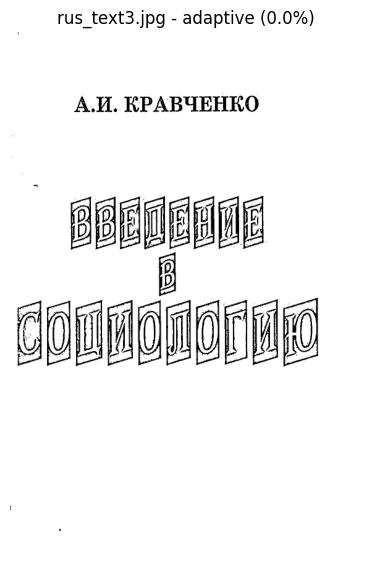


Файл сохранён: rus_text4_best_adaptive.png

=== Распознанный текст из rus_text4.jpg ===
55 В на м Ри ь с -Т- -щ ЕРЕАКЬ б а. а Е с рй Т:Т- БЕ ь р м С В С п й В у у х нк РЕ В о г т ие се я т. й , Беико.-..В -.:В т , сн ге й у НИЕ из я Й у й . ( у соенннеции я Е ОА БЗННИ Вакьй---ЧНИИ в БЫЙ:-:-.-л..ЧАиинниняЧСН Е ы: 5 ы: ы7 т 0-2 их .- СЛИВКИ, - . ЕАИС . . и д он ЕЯ . пИНВрИНВииНИИОиАу, . п. ОХА и. ЗОЕЗЦАЕЗИВЕХИАЮЕЕИЛ Ире . аа ЗаНЙЗАЕОАЕИАРОИИИРЫЫИХИИПИО . 1.7 Ч Е оо пра ОАО, Ни ИН ЖК: ин ИАН Аа ИН ИЛААЯГО КАНО: . НАИИАЕМИдоИИыИет ок АНАНАСА а ЕЕ АНА Я Ни: НИНЕ АНИ: ча Зри . ме На, и аи: г . АИИС О а ги ЕС .- ОНА к ПаЗаНИУИПИТРААЕ4ДАЫ . .. .: ЗЕЕ Е м р р а: НР - -. СОАО :: . . ар ЯОЙ .- .. оо ИЖЕ, ее Я У АН м И НР Е И . ЙО им . НАТ ОЙ, ПКЕ о Аа тЫ ИИА НВ НЫ, оС, : НЕ о ДИ Е АА О, ВЖОЙИИаСаЕани ИИА, . АЗИЯ д ПЕРА, ИаИМАИЯ,енй ра, : :т Ах НЕ И -. рые к. Ра р ео . ям Е з : И 7 Е: , , АЯ и иыйСИАГИаАл АЛИ , Я ОХ И За... т к Я ЗА 2 а АНА а т ИО, Хо Мела ОЙ. 1 ИИ ра ЕО, : пьЙфновн и СИ, и ПоиИИ

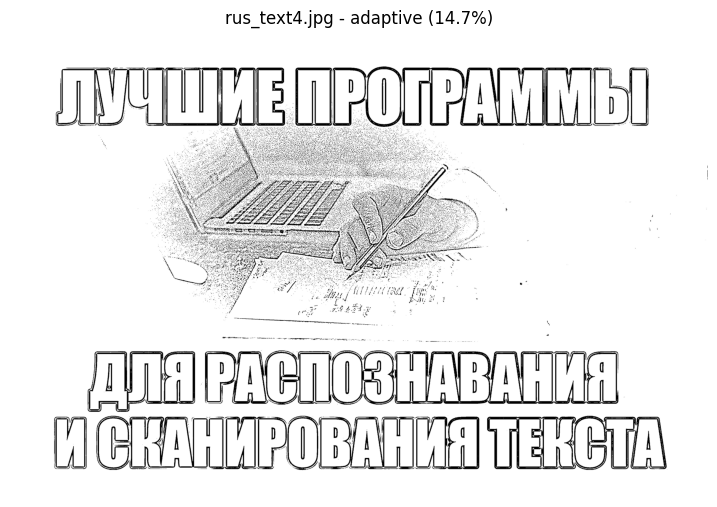


Файл сохранён: rus_text5_best_adaptive.png

=== Распознанный текст из rus_text5.jpg ===
20 сло кеС



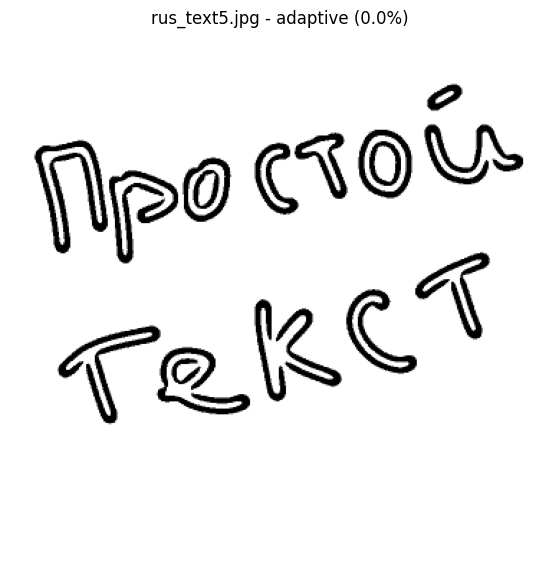


Файл сохранён: rus_text6_best_adaptive.png

=== Распознанный текст из rus_text6.jpg ===
ти



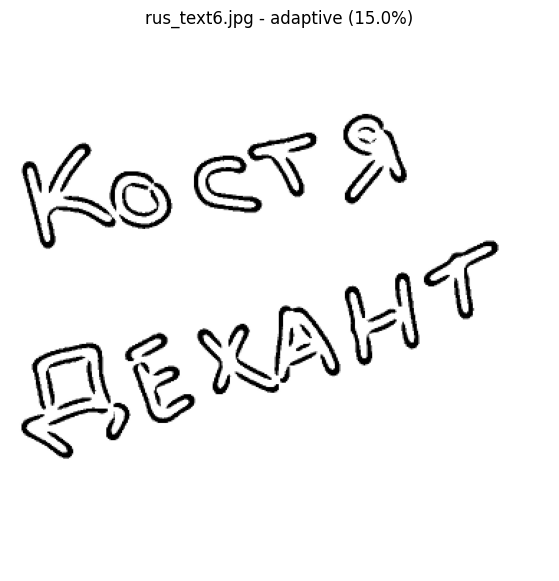

In [17]:
# ----------------- Настройки Tesseract и функции OCR для русского -----------------
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
os.environ['OMP_THREAD_LIMIT'] = '1'
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata/'

def extract_warm_colors(img_bgr):
    resized_img = cv2.resize(img_bgr, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
    hsv_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2HSV)

    orange_low = np.array([0, 40, 40])
    orange_high = np.array([30, 255, 255])
    red1_low = np.array([0, 40, 40])
    red1_high = np.array([10, 255, 255])
    red2_low = np.array([170, 40, 40])
    red2_high = np.array([180, 255, 255])

    mask_orange = cv2.inRange(hsv_img, orange_low, orange_high)
    mask_red1 = cv2.inRange(hsv_img, red1_low, red1_high)
    mask_red2 = cv2.inRange(hsv_img, red2_low, red2_high)

    warm_mask = cv2.bitwise_or(mask_orange, cv2.bitwise_or(mask_red1, mask_red2))

    kernel = np.ones((2,2), np.uint8)
    warm_mask = cv2.morphologyEx(warm_mask, cv2.MORPH_CLOSE, kernel)
    warm_mask = cv2.morphologyEx(warm_mask, cv2.MORPH_OPEN, kernel)

    bg_black = np.zeros_like(resized_img)
    bg_black[warm_mask > 0] = [255,255,255]

    gray_result = cv2.cvtColor(bg_black, cv2.COLOR_BGR2GRAY)
    return gray_result, warm_mask

def prepare_ocr_variants(img_bgr):
    variants_dict = {}
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    gray_resized = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
    adaptive_thresh = cv2.adaptiveThreshold(gray_resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 25, 10)
    variants_dict["adaptive"] = adaptive_thresh
    return variants_dict

def perform_ocr(img, lang="rus", psm_mode=7):
    config_opts = f"--oem 3 --psm {psm_mode} -c tessedit_char_whitelist=АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдеёжзийклмнопрстуфхцчшщъыьэюя0123456789.,!?-:() -c preserve_interword_spaces=1"
    try:
        data = pytesseract.image_to_data(img, lang=lang, config=config_opts, output_type=Output.DICT)
        words, confidences = [], []
        for i in range(len(data["text"])):
            if data["text"][i].strip() and data["conf"][i] != "-1":
                words.append(data["text"][i])
                confidences.append(float(data["conf"][i]))
        full_text = " ".join(words).strip()
        avg_conf = np.mean(confidences) if confidences else 0.0
        return full_text, avg_conf, len(words)
    except Exception:
        return "", 0.0, 0

def select_best_ocr(image_path, lang="rus"):
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print(f"Не удалось открыть файл: {image_path}")
        return None, None, None

    variants = prepare_ocr_variants(img_bgr)
    results = []
    psms = [7, 8, 6, 13]

    for v_name, variant_img in variants.items():
        for psm in psms:
            txt, conf, word_count = perform_ocr(variant_img, lang=lang, psm_mode=psm)
            if not txt or len(txt.strip()) < 2:
                continue
            score = conf + len(txt) * 0.1
            results.append({"variant": v_name, "psm": psm, "text": txt, "conf": conf, "score": score, "image": variant_img})

    if results:
        good_results = [r for r in results if r["conf"] > 20 and len(r["text"]) > 3]
        best_result = max(good_results if good_results else results, key=lambda x: x["score"])
        return best_result["variant"], best_result["image"], {"text": best_result["text"], "conf": best_result["conf"], "psm": best_result["psm"]}
    return None, None, None

def show_bw_image(img, title="", scale=1.0):
    if scale != 1.0:
        h, w = img.shape[:2]
        img_disp = cv2.resize(img, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_CUBIC)
    else:
        img_disp = img
    if len(img_disp.shape) == 2:
        img_disp = cv2.cvtColor(img_disp, cv2.COLOR_GRAY2BGR)
    if 'display_image' in globals() and callable(display_image):
        display_image(img_disp, caption=title)
    else:
        cv2.imwrite(f"tmp_{title}.png", img_disp)
        print(f"Файл сохранён: tmp_{title}.png")

rus_files = ["rus_text1.jpg", "rus_text2.jpg", "rus_text3.jpg", "rus_text4.jpg", "rus_text5.jpg", "rus_text6.jpg"]
for file in rus_files:
    if not os.path.exists(file):
        print(f"Файл не найден: {file}")
        continue
    variant_name, best_img, info = select_best_ocr(file, lang="rus")
    if info:
        out_img_name = f"{os.path.splitext(file)[0]}_best_{variant_name}.png"
        cv2.imwrite(out_img_name, best_img)
        print(f"\nФайл сохранён: {out_img_name}")

        # вывод распознанного текста
        print(f"\n=== Распознанный текст из {file} ===\n{info['text']}\n")

        show_bw_image(best_img, title=f"{file} - {variant_name} ({info['conf']:.1f}%)", scale=0.5)
    else:
        print(f"Текст не распознан в файле {file}")

In [16]:
# ----------------- OCR PDF -----------------
def read_pdf_text(pdf_file, lang="rus+eng", dpi=300, output_txt=None):
    pil_pages = convert_from_path(pdf_file, dpi=dpi)
    all_texts, confidences = [], []

    for idx, pil_page in enumerate(pil_pages, start=1):
        page_img = cv2.cvtColor(np.array(pil_page), cv2.COLOR_RGB2BGR)
        gray = cv2.cvtColor(page_img, cv2.COLOR_BGR2GRAY)
        _, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        cfg = "--oem 3 --psm 6"
        data_dict = pytesseract.image_to_data(th, lang=lang, config=cfg, output_type=Output.DICT)
        page_text = pytesseract.image_to_string(th, lang=lang, config=cfg)
        page_conf = [float(c) for c in data_dict["conf"] if c != "-1"]
        mean_conf = float(np.mean(page_conf)) if page_conf else -1.0
        all_texts.append(f"\n\n===== Страница {idx} | Качество: {mean_conf:.2f}% =====\n{page_text}")
        confidences.append(mean_conf)

    combined_text = "".join(all_texts)
    if output_txt is None:
        output_txt = os.path.splitext(pdf_file)[0] + "_ocr.txt"
    with open(output_txt, "w", encoding="utf-8") as f:
        f.write(combined_text)

    print(f"{pdf_file}: всего страниц - {len(pil_pages)}, среднее качество OCR - {np.mean(confidences):.2f}%")
    print("Текст сохранён в:", output_txt)
    return combined_text, confidences

pdf_text1, pdf_stats1 = read_pdf_text("pdf1.pdf", lang="rus+eng", dpi=300)
pdf_text2, pdf_stats2 = read_pdf_text("pdf2.pdf", lang="rus+eng", dpi=300)

print(pdf_text1[:1500])
print("\n---\n")
print(pdf_text2[:1500])

pdf1.pdf: всего страниц - 1, среднее качество OCR - 67.04%
Текст сохранён в: pdf1_ocr.txt
pdf2.pdf: всего страниц - 6, среднее качество OCR - 74.04%
Текст сохранён в: pdf2_ocr.txt


===== Страница 1 | Качество: 67.04% =====
у OS Le
8 acd co
МИНИСТЕРСТВО Руководителям  образовател-
x ьных организаций высшего
ОБРАЗОВАНИЯ И НАУКИ образования
АЛТАЙСКОГО КРАЯ |
(МИНОБРНАУКИ АЛТАЙСКОГО КРАЯ) Руководителям филиалов
образовательных организаций
ул. Ползунова, 36, г. Барнаул, 656043 высшего образования
телефон: 29-86-00 факс:-29-86-59
E-mail: info@22edu ru Руководителям краевых

, ae МИА профессиональных — образова-
34.03 WORR No AB-05/4F/ AEG тельных организаций
На №

ГО проведении л
Цифровой олимпиады
«Волга-ГТ”22»
Уважаемые руководители!

Информируем, что в 2022 году при поддержке Правительства Ульяновской

области пройдёт Цифровая олимпиада «Волга Т”22» (далее — «Олимпиада»,

которая проводится с 2006 года по актуальным направлениям информационных
и цифровых технологий. Задания разрабатывают